In [119]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import subprocess
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['retaildataset']


In [120]:
sales = pd.read_csv("/kaggle/input/retaildataset/sales data-set.csv")
features = pd.read_csv("/kaggle/input/retaildataset/Features data set.csv")
stores = pd.read_csv("/kaggle/input/retaildataset/stores data-set.csv")
print("Sales Total Col.",len(sales.columns),"\nShape:",sales.shape,"\nColumns:",sales.columns.tolist(),"\n=============")
print("Features Total Col.",len(features.columns),"\nShape:", features.shape, "\nColumns:",features.columns.tolist(),"\n=============")
print("Stores Total Col.",len(stores.columns),"\nShape:",stores.shape, "\nColumns:",stores.columns.tolist())

def insight(df):
    print("--------------------")
    print(df.head())
    

insight(sales)
insight(features)
insight(stores)

Sales Total Col. 5 
Shape: (421570, 5) 
Columns: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'] 
Features Total Col. 12 
Shape: (8190, 12) 
Columns: ['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday'] 
Stores Total Col. 3 
Shape: (45, 3) 
Columns: ['Store', 'Type', 'Size']
--------------------
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False
--------------------
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        Na

**Merge All Dataset**

In [121]:
final = sales.merge(features,how="left", on=['Store', 'Date', 'IsHoliday'])

In [122]:
final = final.merge(stores, how= "left", on=['Store'])
final.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [123]:
print("Final Dataset Col:",len(final.columns),"\nShape: ",final.shape,"\nColumns",final.columns.tolist())

Final Dataset Col: 16 
Shape:  (421570, 16) 
Columns ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size']


In [124]:
info = pd.DataFrame(final.dtypes).T.rename(index={0: 'Column Type'})
info = pd.concat([info, pd.DataFrame(final.isnull().sum()).T.rename(index={0: 'null values (nb)'}), pd.DataFrame(final.isnull().sum() / final.shape[0] * 100).T.rename(index={0: 'null values{%}'})])
info


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Column Type,int64,int64,object,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,int64
null values (nb),0,0,0,0,0,0,0,270889,310322,284479,286603,270138,0,0,0,0
null values{%},0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.257181,73.611025,67.480845,67.984676,64.079038,0.0,0.0,0.0,0.0


In [125]:
info = pd.DataFrame(final.dtypes).T.rename(index={0: 'Column Type'})
info = pd.concat([info, pd.DataFrame(final.isnull().sum()).T.rename(index={0: 'null values (nb)'}), pd.DataFrame(final.isnull().sum() / final.shape[0] * 100).T.rename(index={0: 'null values{%}'})])
info


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Column Type,int64,int64,object,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,int64
null values (nb),0,0,0,0,0,0,0,270889,310322,284479,286603,270138,0,0,0,0
null values{%},0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.257181,73.611025,67.480845,67.984676,64.079038,0.0,0.0,0.0,0.0


In [126]:
print("Duplicate Values : ",final.duplicated().sum())

Duplicate Values :  0


In [127]:
final = final.applymap(lambda x: 1 if x ==  True  else x)
final = final.applymap(lambda x: 0 if x ==  False  else x)

In [128]:
final.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,0,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,0,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,0,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


           Date  Weekly_Sales
112  24/12/2010   80931415.60
107  23/12/2011   76998241.31
117  25/11/2011   66593605.26
122  26/11/2010   65821003.24
79   17/12/2010   61820799.85
74   16/12/2011   60085695.94
46   10/12/2010   55666770.39
41   09/12/2011   55561147.70
25   06/04/2012   53502315.87
27   06/07/2012   51253021.88


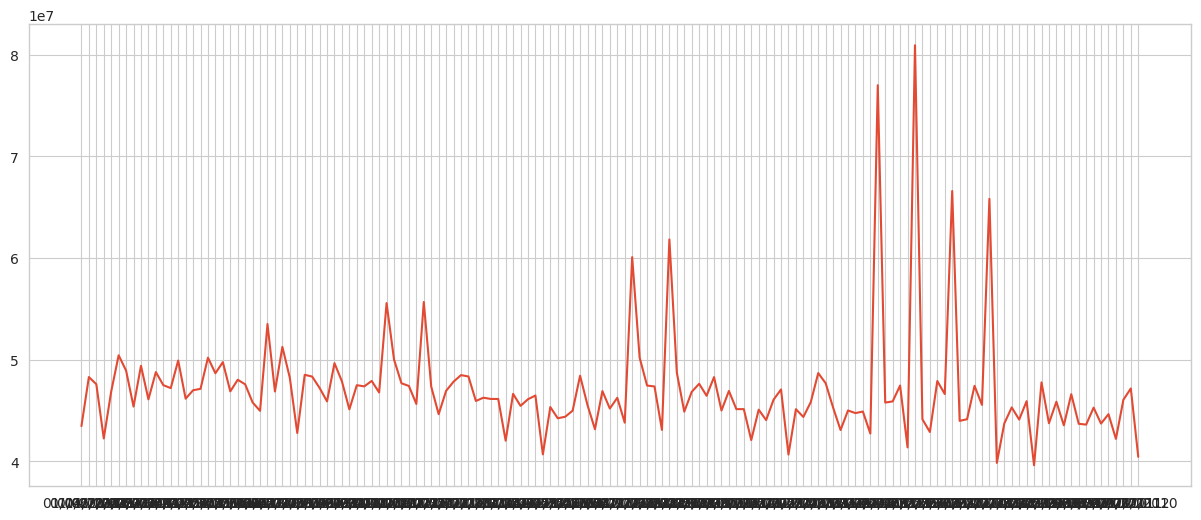

In [129]:
#Average Sales for all store/department for Week

df_average_sales_week = final.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
df_average_sales = df_average_sales_week.sort_values('Weekly_Sales', ascending=False)

print(df_average_sales[:10])

#Seasonality vs Trend Analysis
plt.figure(figsize=(15,6))
plt.plot(df_average_sales_week.Date, df_average_sales_week.Weekly_Sales)
plt.show()

   IsHoliday  Weekly_Sales
0          0  6.231919e+09
1          1  5.052996e+08


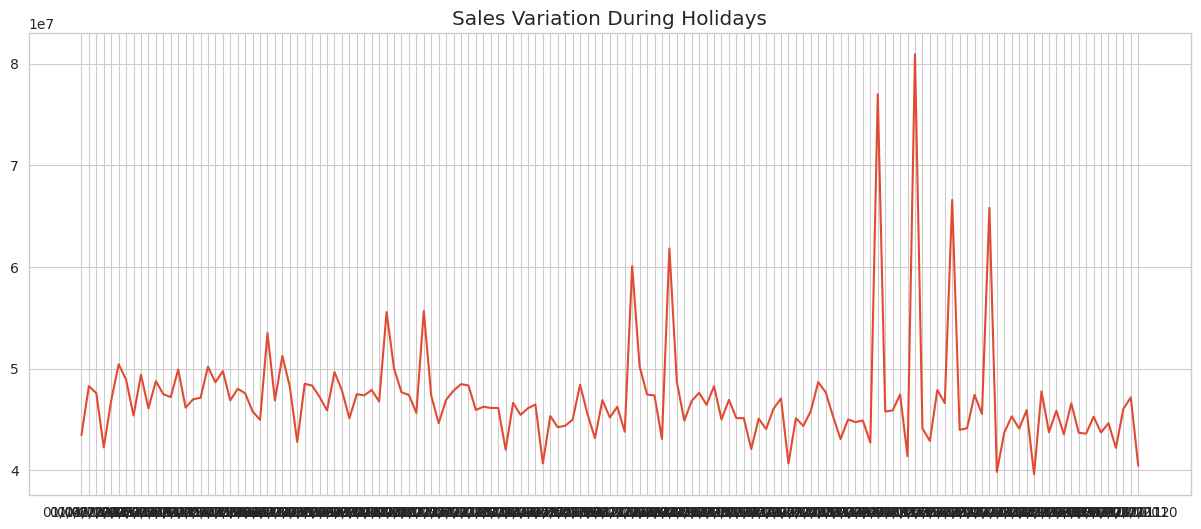

In [130]:
#Sales variation during Holidays(Store/Dept)
holiday =  final[['Date', 'IsHoliday', 'Weekly_Sales']].copy()
holiday =  holiday.groupby(by=['Date','IsHoliday'], as_index=False)['Weekly_Sales'].sum()
holiday_group =  holiday.groupby(by=['IsHoliday'], as_index=False)['Weekly_Sales'].sum()
print( holiday_group)
#print( holiday[:5])

def holiday_sales(df):
    from matplotlib import pyplot as plt
    plt.figure(figsize=(15,6))
    labels = ['Date', 'IsHoliday_x', 'Weekly_Sales']
    plt.title('Sales Variation During Holidays')
    plt.plot(df.Date, df.Weekly_Sales)
    plt.show()
    
holiday_sales(holiday)

In [131]:
final['Return'] = (final['Weekly_Sales'] < 0).astype('int')
final_group = final.groupby(['Return'], as_index = False)['Weekly_Sales'].sum() 
final_group

,Return,Weekly_Sales
0,0,6.737307e+09
1,1,-8.816156e+04


In [132]:
#Making Avg MarkDown
final['AvgMarkDown'] = final['MarkDown1'] + final['MarkDown2'] + final['MarkDown3'] + final['MarkDown4'] + final['MarkDown5']
final['AvgMarkDown'] = final['AvgMarkDown'] / 5
final.AvgMarkDown[378:385]

378     5134.336
379     2559.290
380    11375.348
381     5931.116
382     4573.182
383     1932.570
384     1232.974
Name: AvgMarkDown, dtype: float64

In [133]:
#Creating Weekly sales in a 4 range

final['cum_sum'] = final.Weekly_Sales.cumsum()
final['cum_perc'] = 100*final.cum_sum/final.Weekly_Sales.sum()

final['rangeA'] = 0
final['rangeA'][final['cum_perc'] <= 25] = 1

final['rangeB'] = 0
final['rangeB'][(final['cum_perc'] > 25) & (final['cum_perc'] <= 50)] = 1

final['rangeC'] = 0
final['rangeC'][(final['cum_perc'] > 50) & (final['cum_perc'] <= 75)] = 1

final['rangeD'] = 0
final['rangeD'][final['cum_perc'] > 75] = 1

final = final.drop(['cum_perc', 'cum_sum'], axis=1)

final.head(100)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,CPI,Unemployment,Type,Size,Return,AvgMarkDown,rangeA,rangeB,rangeC,rangeD
0,1,1,05/02/2010,24924.50,0,42.31,2.572,NaN,NaN,NaN,...,211.096358,8.106,A,151315,0,NaN,1,0,0,0
1,1,1,12/02/2010,46039.49,1,38.51,2.548,NaN,NaN,NaN,...,211.242170,8.106,A,151315,0,NaN,1,0,0,0
2,1,1,19/02/2010,41595.55,0,39.93,2.514,NaN,NaN,NaN,...,211.289143,8.106,A,151315,0,NaN,1,0,0,0
3,1,1,26/02/2010,19403.54,0,46.63,2.561,NaN,NaN,NaN,...,211.319643,8.106,A,151315,0,NaN,1,0,0,0
4,1,1,05/03/2010,21827.90,0,46.50,2.625,NaN,NaN,NaN,...,211.350143,8.106,A,151315,0,NaN,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,02/12/2011,25293.49,0,48.91,3.172,5629.51,68.00,1398.11,...,218.714733,7.866,A,151315,0,5931.116,1,0,0,0
96,1,1,09/12/2011,33305.92,0,43.93,3.158,4640.65,19.00,105.02,...,218.961846,7.866,A,151315,0,4573.182,1,0,0,0
97,1,1,16/12/2011,45773.03,0,51.63,3.159,5011.32,67.00,347.37,...,219.179453,7.866,A,151315,0,1932.570,1,0,0,0
98,1,1,23/12/2011,46788.75,0,47.96,3.112,2725.36,40.48,634.70,...,219.357722,7.866,A,151315,0,1232.974,1,0,0,0


In [134]:
#Aggregate the Top performing stores interms of sales
top_stores = final.groupby(by=['Type'], as_index=False)['Weekly_Sales'].sum()
top_stores

,Type,Weekly_Sales
0,A,4.331015e+09
1,B,2.000701e+09
2,C,4.055035e+08


In [135]:
clm = final[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size',
                  'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'AvgMarkDown', 'rangeA', 
                  'rangeB', 'rangeC', 'rangeD', 'Return']].copy()
clm_encoded = pd.get_dummies(clm)
clm_encoded.corr()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,AvgMarkDown,rangeA,rangeB,rangeC,rangeD,Return,Type_A,Type_B,Type_C
Weekly_Sales,1.000000,-0.002312,-0.000120,-0.020921,-0.025864,0.243828,0.085251,0.024130,0.060385,0.045414,0.090362,0.082707,0.030899,0.042184,0.011996,-0.078035,-0.039076,0.185417,-0.131219,-0.095388
Temperature,-0.002312,1.000000,0.143859,0.182112,0.096730,-0.058313,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,-0.202223,0.146173,-0.122620,-0.093847,0.064937,-0.000408,0.024493,-0.109032,0.135651
Fuel_Price,-0.000120,0.143859,1.000000,-0.164210,-0.033853,0.003361,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.174239,-0.123035,0.055708,0.102799,-0.033664,0.005459,-0.037973,0.037317,0.002652
CPI,-0.020921,0.182112,-0.164210,1.000000,-0.299953,-0.003314,-0.055558,-0.039534,-0.023590,-0.049628,0.060630,-0.040269,0.358054,-0.192377,-0.161769,-0.002916,-0.004713,0.083739,-0.081817,-0.006615
Unemployment,-0.025864,0.096730,-0.033853,-0.299953,1.000000,-0.068238,0.050285,0.020940,0.012818,0.024963,-0.003843,0.050244,-0.266233,0.053173,0.084719,0.117235,0.002055,-0.092574,-0.013435,0.175263
Size,0.243828,-0.058313,0.003361,-0.003314,-0.068238,1.000000,0.345673,0.108827,0.048913,0.168196,0.304575,0.241744,-0.025250,0.143315,0.102413,-0.202991,-0.006422,0.762998,-0.455646,-0.528852
MarkDown1,0.085251,-0.040594,0.061371,-0.055558,0.050285,0.345673,1.000000,0.024486,-0.108115,0.819238,0.160257,0.665410,-0.013465,0.097775,0.081642,-0.153302,-0.002902,0.177499,-0.013264,-0.274762
MarkDown2,0.024130,-0.323927,-0.220895,-0.039534,0.020940,0.108827,0.024486,1.000000,-0.050108,-0.007768,-0.007440,0.423730,-0.007806,0.042823,0.012345,-0.047188,0.009115,0.050829,-0.023181,-0.066634
MarkDown3,0.060385,-0.096880,-0.102092,-0.023590,0.012818,0.048913,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,0.386992,0.006246,0.028006,0.003132,-0.035021,-0.004042,0.022686,0.003655,-0.046098
MarkDown4,0.045414,-0.063947,-0.044986,-0.049628,0.024963,0.168196,0.819238,-0.007768,-0.071095,1.000000,0.107792,0.665384,-0.042010,0.033740,0.040560,-0.033247,-0.004348,0.091852,-0.063456,-0.088163


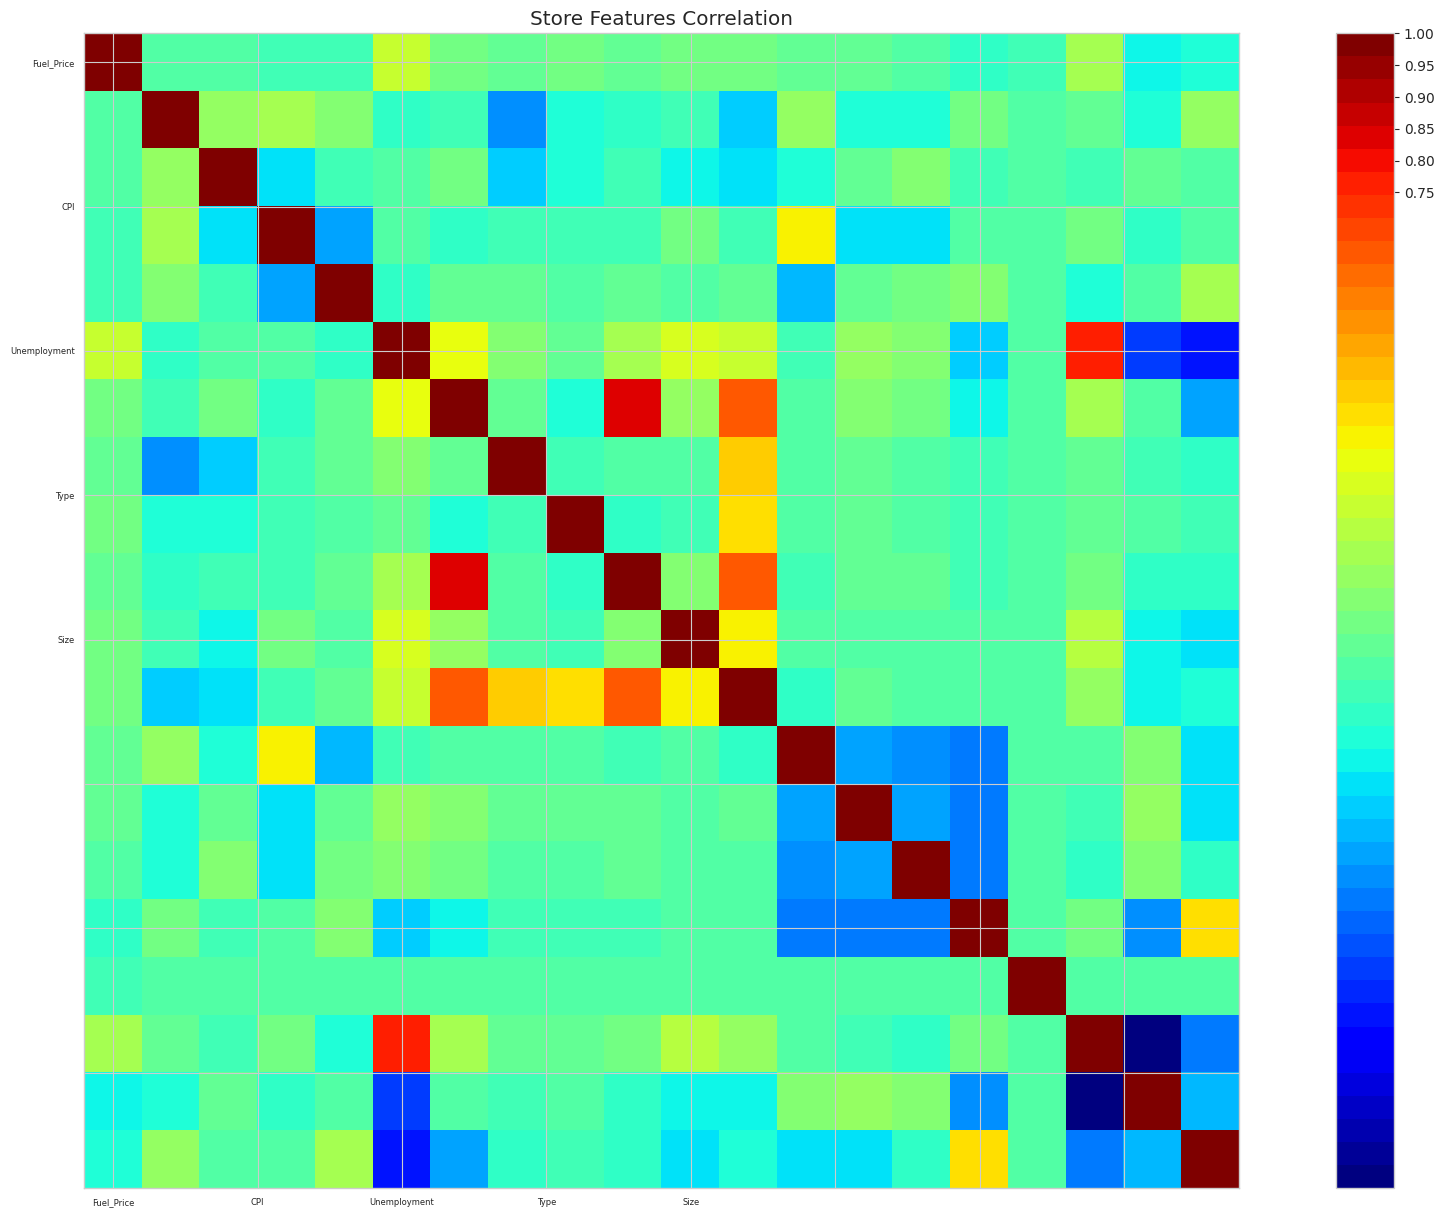

In [136]:
clm = final[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size',
                   'Return']].copy()
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm
    
    fig = plt.figure(figsize = (25,15))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 50)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Store Features Correlation')
    labels=['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size']
    ax1.set_xticklabels(labels, fontsize=6)
    ax1.set_yticklabels(labels, fontsize=6)
    #Add colorbar to make sure to specify a tick location to match desired tick labels
    fig.colorbar(cax, ticks=[.75, .8, .85, .90, .95, 1])
    plt.show()
    
correlation_matrix(clm_encoded)

In [141]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import pandas as pd

# Assuming you have loaded your data into a 'final' DataFrame
# Drop unnecessary columns
final.drop(['Date', 'Type', 'MarkDown1', 'MarkDown4'], axis=1, inplace=True)

# Drop rows with missing values
final.dropna(inplace=True)

# Define your feature matrix X and target variable Y
X = np.array(final.drop(['Weekly_Sales'], axis=1))
Y = np.array(final['Weekly_Sales'])

# Scale the features
X = preprocessing.scale(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, Y_train)

# Evaluate the model's accuracy on the test data
accuracy = clf.score(X_test, Y_test)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.07322612934048489
